<a href="https://colab.research.google.com/github/phamthien300820/CS114.K21/blob/master/CS114_K21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import tensorflow as tf
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import keras.preprocessing.image as img
from keras.applications.resnet50 import ResNet50
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('ggplot')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess
from keras.preprocessing.image import ImageDataGenerator

#deeplearning libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 


Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.listdir('/content/drive/My Drive/Machine_Learning Helmet')

['Không có xe máy', 'Có người đi xe máy']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#resize image 256x256, convert image to array
def convert2array(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
        
def assign_label(img,label):
    return label

In [ ]:
X=[]
Z=[]
IMG_SIZE=256
have="/content/drive/My Drive/Machine_Learning Helmet/Có người đi xe máy"
not_have="/content/drive/My Drive/Machine_Learning Helmet/Không có xe máy"
#set label for data
convert2array('have',have)
convert2array('not_have',not_have)

100%|██████████| 151/151 [01:32<00:00,  1.64it/s]


In [ ]:
X


[array([[[ 15,  20,  11],
         [ 16,  22,  13],
         [118, 115, 108],
         ...,
         [202, 231, 255],
         [205, 233, 255],
         [202, 229, 255]],
 
        [[ 51,  61,  49],
         [ 21,  32,  19],
         [ 21,  27,  16],
         ...,
         [201, 230, 255],
         [200, 229, 255],
         [199, 228, 255]],
 
        [[ 14,  26,  14],
         [ 35,  50,  36],
         [ 31,  44,  30],
         ...,
         [201, 229, 255],
         [202, 230, 255],
         [201, 230, 255]],
 
        ...,
 
        [[  9,  20,  10],
         [  6,  18,  12],
         [ 16,  27,  19],
         ...,
         [  6,  24,  11],
         [ 15,  31,  20],
         [ 14,  31,  20]],
 
        [[  8,  22,  11],
         [  7,  19,  13],
         [  9,  24,  16],
         ...,
         [ 14,  28,  17],
         [ 28,  46,  32],
         [ 12,  30,  17]],
 
        [[  9,  21,  12],
         [ 12,  26,  15],
         [  9,  22,  14],
         ...,
         [ 15,  30,  19],
  

In [ ]:
np.save("/content/drive/My Drive/X.npy",X)

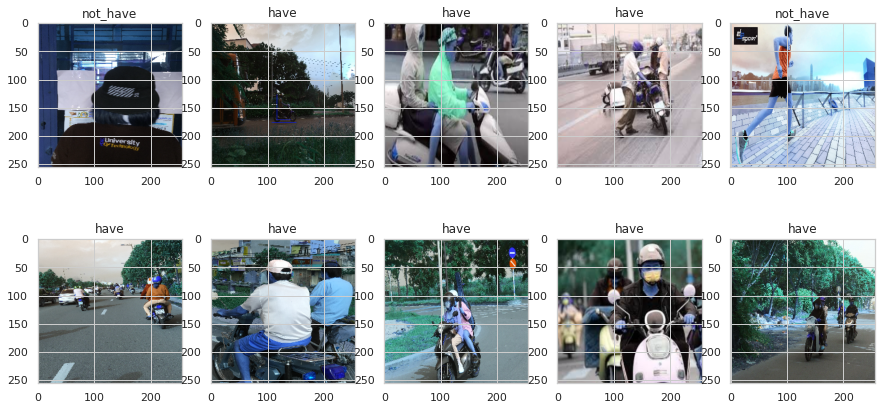

In [ ]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)
#show several images
for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)# transform label to 0 and 1
print(Y)
X=np.load("/content/drive/My Drive/X.npy")
X=np.array(X)
#rate 75:25
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1337)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
Res_model=ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3), pooling='max')
'''include_top=False : load a network that doesn't include the classification layers at the top,
 which is ideal for feature extraction
'''
Res_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
94658560/94653016 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 

In [ ]:
model=Sequential()
model.add(Res_model)
model.add(Dropout(0.20))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
epochs=50
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
Res_model.trainable=False
'''
 prevent the weights in a given layer from being updated during training.
Resnet has many layers, so setting the entire model's trainable flag to False will freeze all the layers.
'''
model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total params: 30,408,066
Trainable params: 6,820,354
Non-trainable params: 23,587,712
__________________________________

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test))

Train on 690 samples, validate on 231 samples
Epoch 1/50
690/690 [==============================] - 17s 25ms/step - loss: 1.1097 - accuracy: 0.7754 - val_loss: 0.3579 - val_accuracy: 0.8442
Epoch 2/50
690/690 [==============================] - 10s 15ms/step - loss: 0.3499 - accuracy: 0.8783 - val_loss: 0.2093 - val_accuracy: 0.9307
Epoch 3/50
690/690 [==============================] - 10s 15ms/step - loss: 0.1601 - accuracy: 0.9333 - val_loss: 0.1878 - val_accuracy: 0.9351
Epoch 4/50
690/690 [==============================] - 10s 15ms/step - loss: 0.1131 - accuracy: 0.9580 - val_loss: 0.2730 - val_accuracy: 0.9221
Epoch 5/50
690/690 [==============================] - 10s 15ms/step - loss: 0.1182 - accuracy: 0.9594 - val_loss: 0.1754 - val_accuracy: 0.9567
Epoch 6/50
690/690 [==============================] - 10s 15ms/step - loss: 0.0699 - accuracy: 0.9754 - val_loss: 0.1654 - val_accuracy: 0.9567
Epoch 7/50
690/690 [==============================] - 10s 15ms/step - loss: 0.0714 - accur

In [ ]:
model.save('/content/drive/My Drive/Res_model.h5')

NotImplementedError: ignored

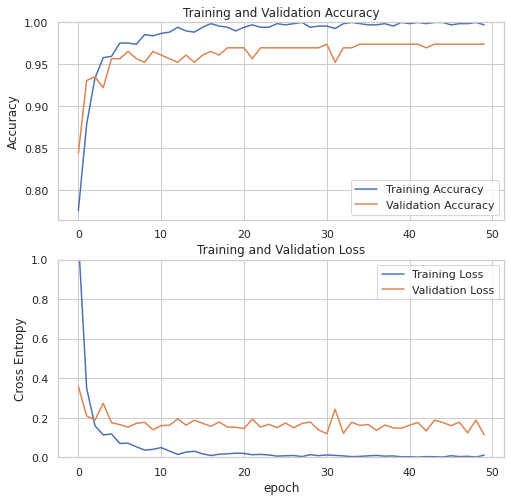

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/My Dataset/Res_model.h5')

OSError: ignored

In [ ]:
import random
path = "/content/drive/My Drive/Train/Have"
files = os.listdir(path)
random.shuffle(files)

  0%|          | 0/12 [00:00<?, ?it/s]

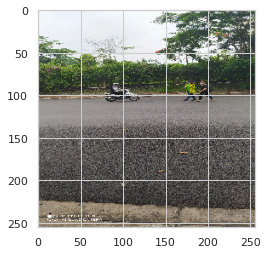

  8%|▊         | 1/12 [00:00<00:07,  1.53it/s]

Co xe may 


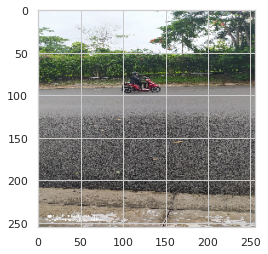

 17%|█▋        | 2/12 [00:01<00:06,  1.53it/s]

Co xe may 


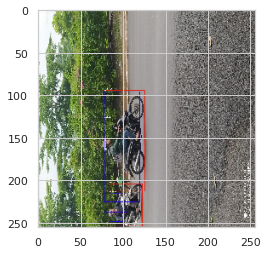

 25%|██▌       | 3/12 [00:01<00:05,  1.67it/s]

Co xe may 


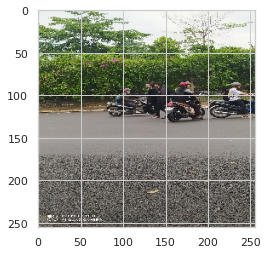

 33%|███▎      | 4/12 [00:02<00:04,  1.64it/s]

Co xe may 


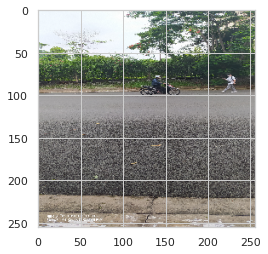

 42%|████▏     | 5/12 [00:03<00:04,  1.61it/s]

Co xe may 


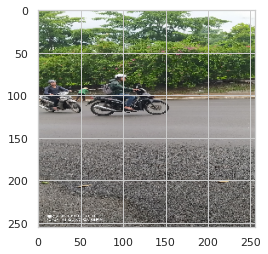

 50%|█████     | 6/12 [00:03<00:03,  1.60it/s]

Co xe may 


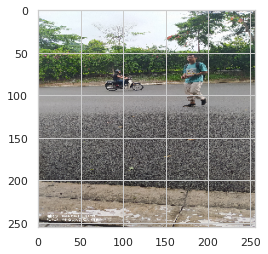

 58%|█████▊    | 7/12 [00:04<00:03,  1.59it/s]

Co xe may 


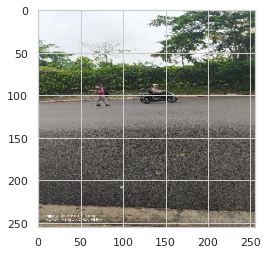

 67%|██████▋   | 8/12 [00:05<00:02,  1.55it/s]

Co xe may 


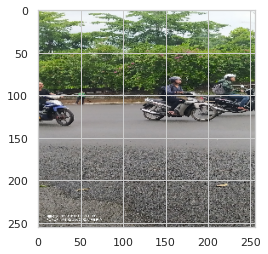

 75%|███████▌  | 9/12 [00:05<00:01,  1.57it/s]

Co xe may 


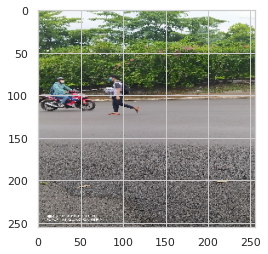

 83%|████████▎ | 10/12 [00:06<00:01,  1.56it/s]

Co xe may 


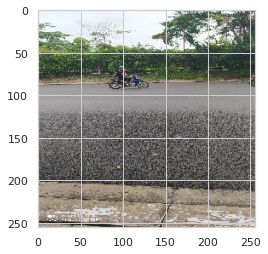

 92%|█████████▏| 11/12 [00:06<00:00,  1.56it/s]

Co xe may 


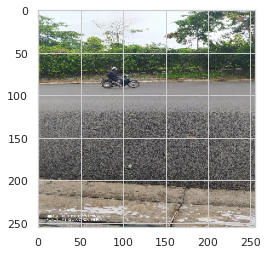

100%|██████████| 12/12 [00:07<00:00,  1.58it/s]

Co xe may 


In [ ]:
for i in tqdm(files):
    pth = os.path.join(path,i)
    X = cv2.imread(pth,cv2.IMREAD_COLOR)
    X = cv2.resize(X,(256,256))
    plt.figure()
    plt.imshow(X[:,:,::-1]) 
    plt.show()  

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if y_pred[0][0] == 1:
        print("Co xe may ")
    else:
        print("Khong co xe may")

In [ ]:
y_predict=model.predict(x_test)
y_predict=np.argmax(y_predict, axis=1)
y_true=np.argmax(y_test, axis=1)

In [ ]:
y_predict.shape,y_true.shape

((231,), (231,))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       189
           1       0.97      0.88      0.93        42

    accuracy                           0.97       231
   macro avg       0.97      0.94      0.95       231
weighted avg       0.97      0.97      0.97       231



**Fine Tune**

In [ ]:
Res_model.trainable = True

In [ ]:
#See how many layers are in the Res model
print("Num of layers in the Res model: ", len(Res_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in Res_model.layers[:fine_tune_at]:
  layer.trainable =  False

Num of layers in the Res model:  176


In [ ]:
model_ft=Sequential()
model_ft.add(Res_model)
model_ft.add(Dropout(0.20))
model_ft.add(Dense(2048,activation='relu'))
model_ft.add(Dense(1024,activation='relu'))
model_ft.add(Dense(512,activation='relu'))
model_ft.add(Dense(2,activation='softmax'))

In [ ]:
base_learning_rate = 0.0001
model_ft.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_ft.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 1026      
Total params: 30,408,066
Trainable params: 26,273,282
Non-trainable params: 4,134,784
__________________________________

In [ ]:
fine_tune_epochs = 10
initial_epochs =10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model_ft.fit(x_train,y_train,
                         epochs=total_epochs,
                         validation_data=(x_test,y_test))

Train on 690 samples, validate on 231 samples
Epoch 1/20
690/690 [==============================] - 18s 26ms/step - loss: 0.4467 - accuracy: 0.8435 - val_loss: 0.1486 - val_accuracy: 0.9437
Epoch 2/20
690/690 [==============================] - 16s 23ms/step - loss: 0.0843 - accuracy: 0.9681 - val_loss: 0.1442 - val_accuracy: 0.9524
Epoch 3/20
690/690 [==============================] - 16s 23ms/step - loss: 0.0714 - accuracy: 0.9739 - val_loss: 0.1569 - val_accuracy: 0.9524
Epoch 4/20
690/690 [==============================] - 16s 23ms/step - loss: 0.0097 - accuracy: 0.9986 - val_loss: 0.1082 - val_accuracy: 0.9697
Epoch 5/20
690/690 [==============================] - 16s 23ms/step - loss: 0.0080 - accuracy: 0.9986 - val_loss: 0.0976 - val_accuracy: 0.9654
Epoch 6/20
690/690 [==============================] - 16s 23ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1363 - val_accuracy: 0.9654
Epoch 7/20
690/690 [==============================] - 16s 23ms/step - loss: 0.0096 - accur

In [ ]:
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

KeyError: ignored

In [ ]:
y_predict=model_ft.predict(x_test)
y_predict=np.argmax(y_predict, axis=1)
y_true=np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        92
           1       0.96      0.98      0.97        89

    accuracy                           0.97       181
   macro avg       0.97      0.97      0.97       181
weighted avg       0.97      0.97      0.97       181



In [ ]:
model_ft.save('/content/drive/My Drive/My Dataset/model_ft.h5')